### Importing Necessary Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timestamps and 1 output

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the RNN

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True ,input_shape= (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling & Fitting the RNN

In [9]:
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0915
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0069
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0055
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0049
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0043
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0039
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0040
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - lo

### Making Predictions and visualizing the data

### Getting the real stock price of 2017

In [11]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs_scaled = sc.transform(inputs)
X_test = []
for i in range(60, 60 + len(dataset_test)):
    X_test.append(inputs_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


### Visualizing Results

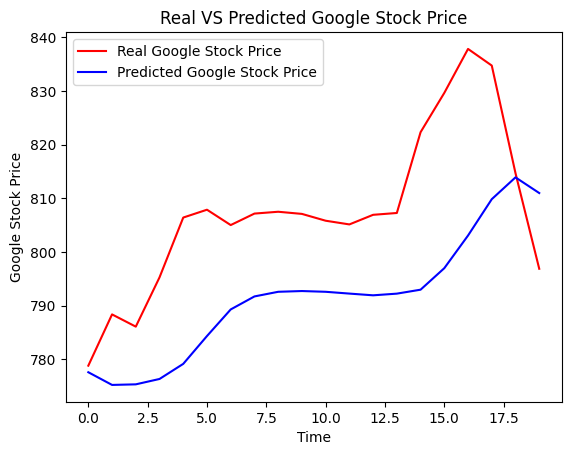

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Real VS Predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()